### Bad Data

In [3]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2]

<i>Because the data in the lists are not contegious one is stored somewhere in the memory having a reference count and the other
somewhere else while numPy array creates one object as a whole having one reference count of that and contegious.</i>

In [4]:
expression_data

[[100, 200, 50, 400], [50, 0, 0, 100], [350, 100, 50, 200]]

### NumPy

In [5]:
import numpy as np
a = np.array(expression_data)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


We are going to:

<ul>
<li> Obtain an RPKM expression matrix
<li>Quantile normalize the data 
</ul>
using the awesome power of NumPy

### Inside a numPy nd Array

In [6]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int32
strides: (16, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [7]:
print(a.data)

### Ravel
<i>Changes the dimesion of array to 1d<i/>

In [8]:
a.ravel().shape

(12,)

In [9]:
abytes = a.ravel().view(dtype = np.uint8)

In [10]:
print_info(abytes)

number of elements: 48
number of dimensions: 1
shape: (48,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [11]:
print(abytes[:24])

[100   0   0   0 200   0   0   0  50   0   0   0 144   1   0   0  50   0
   0   0   0   0   0   0]


### Example of Transpose

In [12]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int32
strides: (16, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [13]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int32
strides: (4, 16)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [14]:
#Every 2nd row of a
print_info(a.T[::2])

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int32
strides: (8, 16)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [15]:
#Skip every 2nd Column
print_info(a.T[::2][::2])

number of elements: 3
number of dimensions: 2
shape: (1, 3)
data type: int32
strides: (16, 16)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



### Copying
<i>If we don't use a copy() then if you modify copy it will modify the original array<i/>  

In [16]:
b = a.copy()

In [17]:
b[0][0] = 1

In [18]:
a

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [19]:
b

array([[  1, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

### Advanced Operations - Axis wise Operations

In [20]:
expr = np.load('C:/Users/Dell/Desktop/data-set/expr.npy')

In [21]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [22]:
expr

array([[     0,      0,      0, ...,      0,     18,      0],
       [    12,      1,      0, ...,      2,      3,      4],
       [ 64134,  52319,  48016, ...,  80938, 105589,  92008],
       ...,
       [   401,   2518,   1511, ...,   2260,   3574,   3936],
       [   458,   2164,    540, ...,    977,   1302,    681],
       [     0,      0,      0, ...,     10,      0,      0]],
      dtype=uint32)

In [23]:
lib_size = np.sum(expr, axis = 0)

In [24]:
lib_size.shape

(375,)

### Exercise
Generate a 10 x 3 array of random numbers. From each row, pick the column containing the number closest to 0.75.

Hint: use of np.abs and np.argmin to find the column j that contains the closest element in each row i. The final result should be a vector of integers of shape (10,).

In [25]:
arr = np.random.random([10,3])
arr

array([[0.81220397, 0.44879403, 0.3419217 ],
       [0.64112982, 0.74969513, 0.86377329],
       [0.67594181, 0.26591719, 0.13804945],
       [0.38920969, 0.15899851, 0.60092571],
       [0.10440618, 0.97534693, 0.64213615],
       [0.12144515, 0.61871806, 0.50640066],
       [0.77303995, 0.51560714, 0.47313884],
       [0.13092766, 0.8824677 , 0.50382497],
       [0.76463958, 0.70817438, 0.65848112],
       [0.72771725, 0.14809122, 0.3845458 ]])

In [26]:
#Calculating the distance to 75
dist75 = np.abs(arr - .75)
dist75

array([[6.22039666e-02, 3.01205969e-01, 4.08078300e-01],
       [1.08870179e-01, 3.04866798e-04, 1.13773295e-01],
       [7.40581914e-02, 4.84082814e-01, 6.11950551e-01],
       [3.60790311e-01, 5.91001487e-01, 1.49074294e-01],
       [6.45593821e-01, 2.25346932e-01, 1.07863846e-01],
       [6.28554846e-01, 1.31281937e-01, 2.43599339e-01],
       [2.30399539e-02, 2.34392861e-01, 2.76861158e-01],
       [6.19072337e-01, 1.32467697e-01, 2.46175031e-01],
       [1.46395796e-02, 4.18256184e-02, 9.15188759e-02],
       [2.22827489e-02, 6.01908777e-01, 3.65454198e-01]])

In [27]:
#Finding the indexes of smaller 
np.argmin(dist75, axis = 1)

array([0, 1, 0, 2, 2, 1, 0, 1, 0, 0], dtype=int64)

Some applications, such as clustering, are computationally expensive, and wouldn't work without first doing some form of feature selection, where we discard most of the data and keep only what we think will be most useful. One simple version is to keep only the genes with the most variance (as these will be more informative than genes that don't vary between patients).

<li>Find the variance across patients of all the genes (rows) in the expression dataset.
<li>Use np.argsort to find the location of the 1,500 most variable genes.
<li>Use these indices to produce a shape (1500, 375) matrix containing only the most variable genes.

In [28]:
#Calculating variances across the columns
row_var = np.var(expr, axis = 1)

In [29]:
row_var.shape

(20500,)

In [30]:
#argsort sorts the array from low to high so most variable data is on the end
row_variance_order = np.argsort(row_var)

In [31]:
#Getting most variable rows which are the last ones that's why negative indexing
most_variable_rows = row_variance_order[-1500:]

In [32]:
#Fetching those into most_variable_data
most_variable_data = expr[most_variable_rows]

In [33]:
#Calculating the shape
most_variable_data.shape

(1500, 375)

### Advanced operations: broadcasting
In order to normalize every column by its corresponding library size, we have to align the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use np.newaxis to match the dimensions. But let's first do some simple examples:

In [34]:
a

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [35]:
#Broadcasting
a + 5

array([[105, 205,  55, 405],
       [ 55,   5,   5, 105],
       [355, 105,  55, 205]])

In [41]:
b = np.array([1 , 2, 3, 4])
a + b

array([[101, 202,  53, 404],
       [ 51,   2,   3, 104],
       [351, 102,  53, 204]])

In [43]:
# Cannot do these
# b = np.array([1, 2, 3])
# a + b

In [39]:
b = np.array([[1], [2], [3]])
a + b

array([[101, 201,  51, 401],
       [ 52,   2,   2, 102],
       [353, 103,  53, 203]])

In [40]:
b.shape

(3, 1)

In [44]:
lib_size = np.sum(expr, axis = 0)

In [48]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


In [49]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [50]:
expr_lib = expr / lib_size

In [51]:
expr_lib *= 1e6

In [54]:
gene_len = np.load('C:/Users/Dell/Desktop/data-set/gene-lens.npy')
print(gene_len.shape)

(20500,)


# Exercise: broadcast expr_lib and gene_len together to produce RPKM
### Reminder:

 
 

where 
 <li>is the raw counts, 
 <li>is the library size (in reads) and 
 <li>is the gene length (in bases).

In [55]:
gene_len.shape

(20500,)

In [56]:
#Right Aligning
gene_len[:, np.newaxis].shape

(20500, 1)

In [57]:
expr.shape

(20500, 375)

In [59]:
rpkm = expr_lib / gene_len[:, np.newaxis] * 1e6

In [60]:
rpkm.shape

(20500, 375)

In [61]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    fig, ax = plt.subplots()
    for density in density_per_col:
        ax.plot(x, density(x), *args, **kwargs)
    ax.set_xlabel('log-counts')
    ax.set_ylabel('frequency')
    if xlim is not None:
        ax.set_xlim(xlim)
    plt.show()

In [62]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# plot_col_density(np.log(expr+1))

In [65]:
# plot_col_density(np.log(rpkm + 1), xlim=(0, 6))

In [66]:
x = np.random.random(size=(3, 5))
y = np.random.randint(10, size=8)

In [67]:
x.shape

(3, 5)

In [68]:
z = x + y[:, np.newaxis, np.newaxis]

In [69]:
z.shape

(8, 3, 5)

In [70]:
z = x[..., np.newaxis] + y[np.newaxis, np.newaxis, :]

In [71]:
z.shape

(3, 5, 8)

In [72]:
a = np.zeros((5, 5))
b = np.ones((5, 5))
a + b

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [73]:
xbroad, ybroad = np.broadcast_arrays(x[..., np.newaxis], y)

In [74]:
print_info(xbroad)

number of elements: 120
number of dimensions: 3
shape: (3, 5, 8)
data type: float64
strides: (40, 8, 0)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True  (with WARN_ON_WRITE=True)
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [77]:
print_info(ybroad)

number of elements: 120
number of dimensions: 3
shape: (3, 5, 8)
data type: int32
strides: (0, 0, 4)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True  (with WARN_ON_WRITE=True)
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [78]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [79]:
row = np.random.random(size=5)
repeated_row = repeat(row, 4)
print(row)

[0.27246524 0.66345837 0.56532283 0.10091585 0.12210325]


In [80]:
print_info(repeated_row)

number of elements: 20
number of dimensions: 2
shape: (4, 5)
data type: float64
strides: (0, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [81]:
print_info(np.copy(repeated_row))

number of elements: 20
number of dimensions: 2
shape: (4, 5)
data type: float64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [82]:
x = np.random.random((3, 2)).astype(np.float32)

In [83]:
y = repeat(x, 4)

In [84]:
print_info(x)

number of elements: 6
number of dimensions: 2
shape: (3, 2)
data type: float32
strides: (8, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [86]:
print_info(y)

number of elements: 24
number of dimensions: 3
shape: (4, 3, 2)
data type: float32
strides: (0, 8, 4)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [87]:
def sliding_window(arr, size=2):
    """Produce an array of sliding window views of `arr`
    
    Parameters
    ----------
    arr : 1D array, shape (N,)
        The input array.
    size : int, optional
        The size of the sliding window.
        
    Returns
    -------
    arr_slide : 2D array, shape (N - size + 1, size)
        The sliding windows of size `size` of `arr`.
        
    Examples
    --------
    >>> a = np.array([0, 1, 2, 3])
    >>> sliding_window(a, 2)
    array([[0, 1],
           [1, 2],
           [2, 3]])
    """
    stride = arr.strides[0]
    n_windows = arr.size - size + 1
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n_windows, size),
                                           strides=(stride, stride))

In [88]:
# test your code here
sliding_window(np.arange(8), 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [89]:
def mean_filter(signal, window_size=3):
    """Apply a mean filter to the input with the desired window size.
    
    Parameters
    ----------
    signal : 1D array, shape (M,)
        The input signal.
    window_size : int, optional
        The size of the window along which to compute the mean.
        
    Returns
    -------
    filtered : 1D array, shape (M - window_size + 1,)
        The filtered signal.
    """
    signal_sliding = sliding_window(signal, window_size)
    filtered = np.mean(signal_sliding, axis=1)
    return filtered

In [92]:
# signal = np.zeros(100, np.float)
# signal[30:60] = 1

# diff = np.array([1, 0, -1])
# from scipy import ndimage as ndi
# dsignal = ndi.convolve(signal, diff)

In [93]:
# fig, ax = plt.subplots(1, 2)
# ax[0].plot(signal)
# ax[0].set_title('signal')
# ax[1].plot(dsignal)
# ax[1].set_title('change')
# fig.tight_layout()

In [95]:
# np.random.seed(0)
# signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
# dsignal_noisy = ndi.convolve(signal_noisy, diff)

# fig, ax = plt.subplots(1, 2)
# ax[0].plot(signal_noisy)
# ax[0].set_title('signal')
# ax[1].plot(dsignal_noisy)
# ax[1].set_title('change')
# fig.tight_layout()

In [97]:
# filtered_diff = ndi.convolve(mean_filter(signal_noisy, 5), diff)
# fig, ax = plt.subplots()
# ax.plot(filtered_diff)

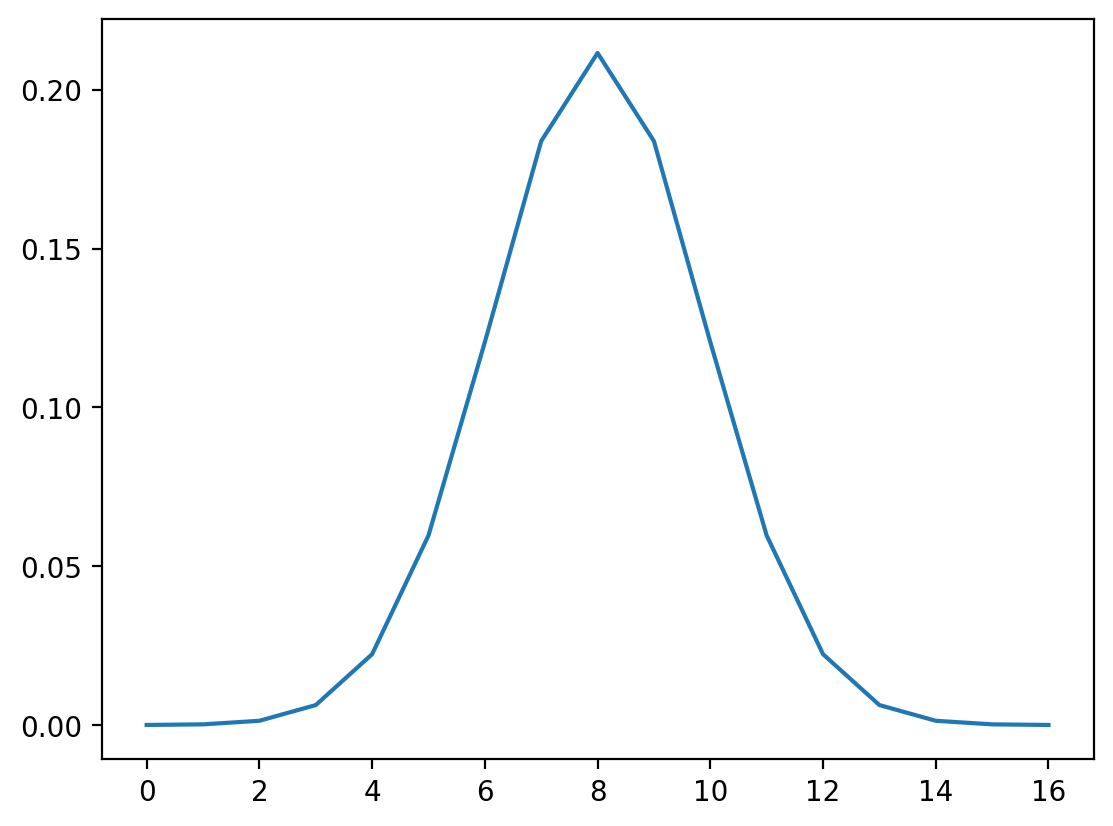

In [98]:
weight = np.exp(-(np.arange(-8, 9) / (8/3))**2)
weight /= np.sum(weight)  ## ensure overall intensity of signal doesn't change
fig, ax = plt.subplots()
ax.plot(weight)

In [100]:
# windows = sliding_window(signal_noisy, size=17)
# print(windows.shape)
# print(weight[np.newaxis, :].shape)

In [102]:
# weighted = windows * weight
# filtered_gaussian = np.sum(weighted, axis=1)
# fig, ax = plt.subplots()
# ax.plot(filtered_gaussian)

In [103]:
# diff_gaussian = ndi.convolve(filtered_gaussian, diff)
# fig, ax = plt.subplots()
# ax.plot(diff_gaussian)

In [104]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector])

[[0 1 0 1]
 [1 2 0 2]
 [0 0 0 2]]
[[ 0  5  0  5]
 [ 5 99  0 99]
 [ 0  0  0 99]]


In [105]:
values[np.array([[1, 2, 2, 2, 0], [1, 1, 1, 1, 1]])]

array([[ 5, 99, 99, 99,  0],
       [ 5,  5,  5,  5,  5]])

In [106]:
values2d = np.array([[0, 5, 99],
                     [8, 70, 80]])

In [107]:
values2d[1, 2]

80

In [108]:
values2d[np.array([1]), np.array([0, 2])]

array([ 8, 80])

In [109]:
relabeled = values[selector]

In [110]:
relabeled

array([[ 0,  5,  0,  5],
       [ 5, 99,  0, 99],
       [ 0,  0,  0, 99]])

In [111]:
has_large_cols = np.any(relabeled > 10, axis=1)
has_large_cols

array([False,  True,  True])

In [112]:
print(relabeled[has_large_cols])

[[ 5 99  0 99]
 [ 0  0  0 99]]


In [113]:
no99 = ~np.any(relabeled == 99, axis=0)

In [114]:
large_cols_idx = np.nonzero(has_large_cols)[0][:, np.newaxis]

In [115]:
no99_idx = np.nonzero(no99)[0][np.newaxis, :]

In [116]:
relabeled[large_cols_idx, no99_idx]

array([[5, 0],
       [0, 0]])

In [119]:
# numexpr, numba

In [120]:
# z = x + y + q ** 2

In [122]:
# def qnorm(X):
#     """Quantile normalize an input matrix.
    
#     Parameters
#     ----------
#     X : 2D array of float, shape (M, N)
#         The input data, with each column being a
#         distribution to normalize.
        
#     Returns
#     -------
#     Xn : 2D array of float, shape (M, N)
#         The normalized data.
#     """
#     ranks = 
#     return Xn